Introduction:
The data we plan on using for the project is from Kaggle. Our dataset has 5110 rows and is called healthcare-dataset-stroke-data.csv. It can be used to predict whether a patient is likely to have a stroke. Our dataset has different attributes like age, gender, marital status, various diseases, and employment status. We are interested in discovering the relationship between the patient having heart disease and a history of having a stroke, the age of the patient and the relationship to stroke history(The median age is 45 so it will be split by that age), and if there is a correlation between whether they were ever married and stroke history.


Preparing and Wrangling Data: We decided to reduce our dataset to make it easier to work with. We deleted the BMI and Smoking columns in the dataset. These columns were the only columns that have null values. Removing the BMI and smoking columns removes all of our null values and makes our data easier to manage. In addition, we removed the ID column, as it is not relevant to the questions we are planning on answering. Also we had to convert the string data into integers and we did so through the implementation of this key.

**Gender**: 0 = Female, Male = 1, 2 = Other
**Ever** Married: 0 = No, 1 = Yes
**Work type**: 0 = Private, 1 = Self-employed, 2 = Gov’t, 3 = , 4 = Never Worked
**Residence Type**: 0 = Rural, 1 = Urban



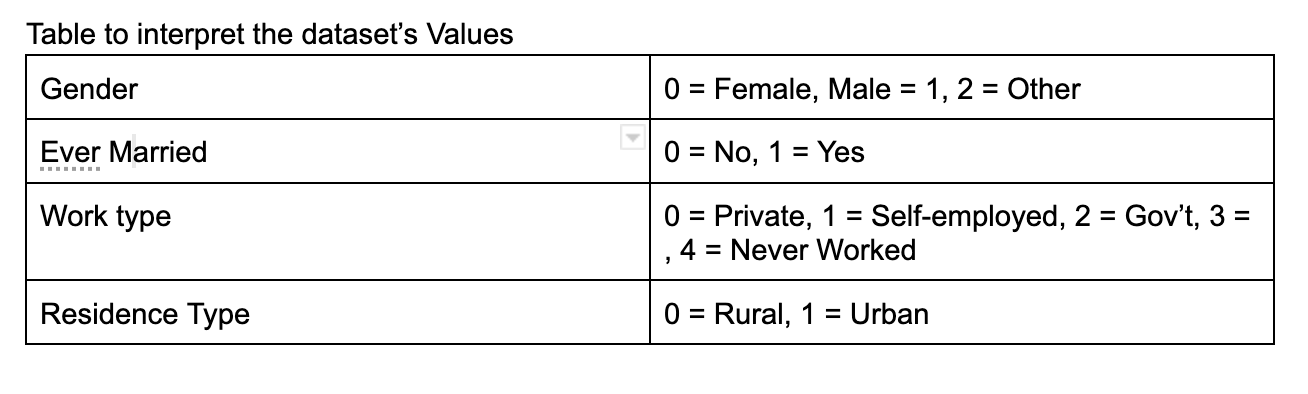

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q kaggle
from google.colab import files
%matplotlib inline




In [ ]:
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


{'healthcare-dataset-stroke-data.csv': b'gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke\r\n1,67,0,1,1,1,228.69,1\r\n0,61,0,0,1,0,202.21,1\r\n1,80,0,1,1,0,105.92,1\r\n0,49,0,0,1,1,171.23,1\r\n0,79,1,0,1,0,174.12,1\r\n1,81,0,0,1,1,186.21,1\r\n1,74,1,1,1,0,70.09,1\r\n0,69,0,0,0,1,94.39,1\r\n0,59,0,0,1,0,76.15,1\r\n0,78,0,0,1,1,58.57,1\r\n0,81,1,0,1,0,80.43,1\r\n0,61,0,1,1,0,120.46,1\r\n0,54,0,0,1,1,104.51,1\r\n1,78,0,1,1,1,219.84,1\r\n0,79,0,1,1,1,214.09,1\r\n0,50,1,0,1,0,167.41,1\r\n1,64,0,1,1,1,191.61,1\r\n1,75,1,0,1,1,221.29,1\r\n0,60,0,0,0,1,89.22,1\r\n1,57,0,1,0,1,217.08,1\r\n0,71,0,0,1,0,193.94,1\r\n0,52,1,0,1,1,233.29,1\r\n0,79,0,0,1,1,228.7,1\r\n1,82,0,1,1,0,208.3,1\r\n1,71,0,0,1,1,102.87,1\r\n1,80,0,0,1,0,104.12,1\r\n0,65,0,0,1,0,100.98,1\r\n1,58,0,0,1,0,189.84,1\r\n1,69,0,1,1,1,195.23,1\r\n1,59,0,0,1,0,211.78,1\r\n1,57,1,0,1,1,212.08,1\r\n1,42,0,0,1,0,83.41,1\r\n0,82,1,0,1,1,196.92,1\r\n1,80,0,1,1,1,252.72,1\r\n1,48,0,0,0,1,84.2,1\r\n0

Stroke DataFrame

In [ ]:
#Features and Targets
stroke_df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

#removing rows with values missing
stroke_df.dropna(inplace=True)

stroke_df.head()


X = stroke_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married']]
y = stroke_df['stroke']

In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
#Training and Testing 
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9491392801251957
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .95, meaning that 95% of the predicted strokes actually had a stroke. Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke. F1-score: measures the models accuracy on a dataset. our F1-score is .97, meaning that our model is 97% accurate when predicting strokes.  

Text(0.5, 427.9555555555555, 'Predicted label')

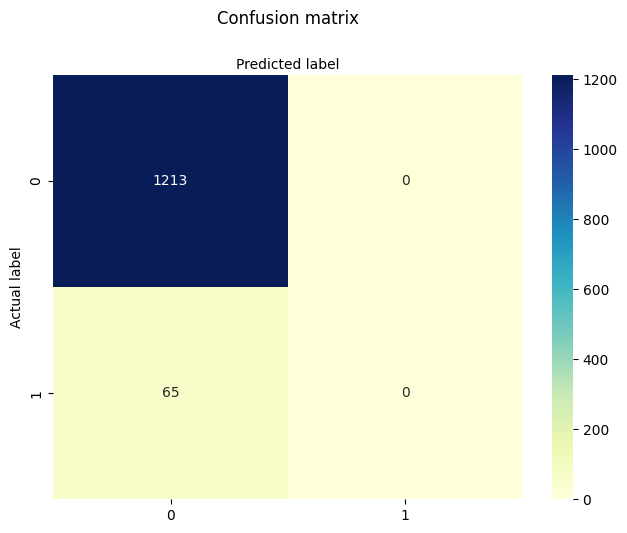

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion Matrix Explanation:

There are 1213 true positives and only 65 false negatives. This means that our model is correctly predicting strokes the majority of the time, but is sometimes not predicting a stroke when it should have. There are no false positives or true negatives in this confusion matrix. 

Male DataFrame

In [ ]:
male_df = stroke_df[stroke_df['gender'] == 1]
X = male_df[['age', 'hypertension', "heart_disease", 'avg_glucose_level', 'ever_married']]
y = male_df['stroke']


In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# _data_train.iloc[:]

In [ ]:
#Training and Testing 
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9376181474480151
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       496
           1       0.00      0.00      0.00        33

    accuracy                           0.94       529
   macro avg       0.47      0.50      0.48       529
weighted avg       0.88      0.94      0.91       529



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .94, meaning that 94% of the predicted strokes actually had a stroke. Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke. F1-score: measures the models accuracy on a dataset. our F1-score is .97, meaning that our model is 97% accurate when predicting strokes.

Text(0.5, 427.9555555555555, 'Predicted label')

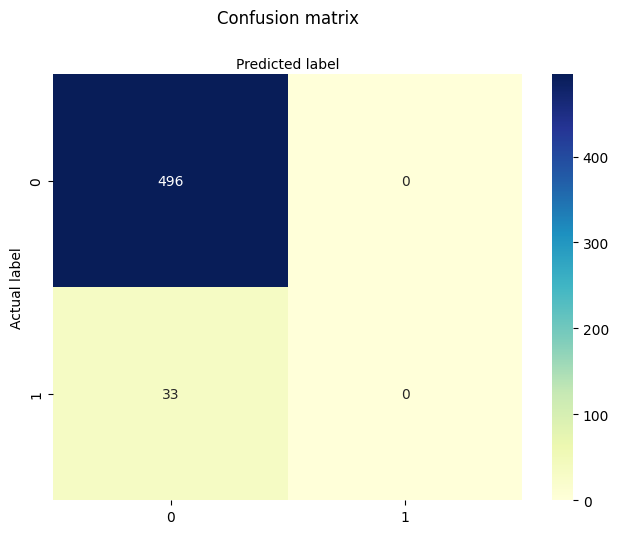

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This confusion matrix shows that our model would correctly predict 496 strokes, but it would have not predicted 33 of them. This shows that our model is fairly accurate. There are no false positives or true negatives.

Female DataFrame

In [ ]:
female_df = stroke_df[stroke_df['gender'] == 0]
X = female_df[['age', 'hypertension', "heart_disease", 'avg_glucose_level']]
y = female_df['stroke']

In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Training and Testing 
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9572763684913218
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       717
           1       0.00      0.00      0.00        32

    accuracy                           0.96       749
   macro avg       0.48      0.50      0.49       749
weighted avg       0.92      0.96      0.94       749



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .96, meaning that 96% of the predicted strokes actually had a stroke. 
Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke. 
F1-score: measures the models accuracy on a dataset. our F1-score is .98, meaning that our model is 98% accurate when predicting strokes.


Text(0.5, 427.9555555555555, 'Predicted label')

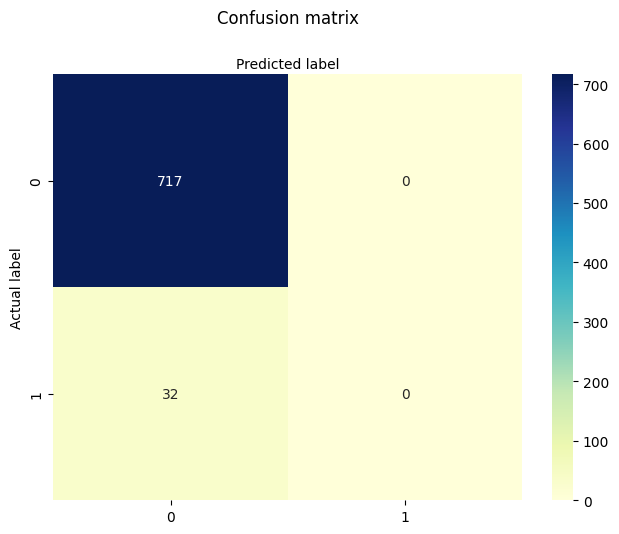

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Given the results of the confusion matrix for the male and female samples, we see a high number of true negatives(TN) that are present within both of these data samples. There is also a small number of false positives(FP) that occur within the data for both male and female samples. In terms of actual differences, they appear to be negligible and are more so a result of each gender having a different sample size.


Young Age (45 and under(median age of the dataset was 45)) Dataframe 

In [ ]:
youngage_df = stroke_df[stroke_df['age'] <= 45]
X = youngage_df[['gender', 'hypertension', "heart_disease", 'avg_glucose_level', 'ever_married']]
y = youngage_df['stroke']

In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Training and Testing 
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9923664122137404
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       650
           1       0.00      0.00      0.00         5

    accuracy                           0.99       655
   macro avg       0.50      0.50      0.50       655
weighted avg       0.98      0.99      0.99       655



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .99, meaning that 99% of the predicted strokes actually had a stroke. Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke. F1-score: measures the models accuracy on a dataset. our F1-score is 1.00, meaning that our model is 100% accurate when predicting strokes.

Text(0.5, 427.9555555555555, 'Predicted label')

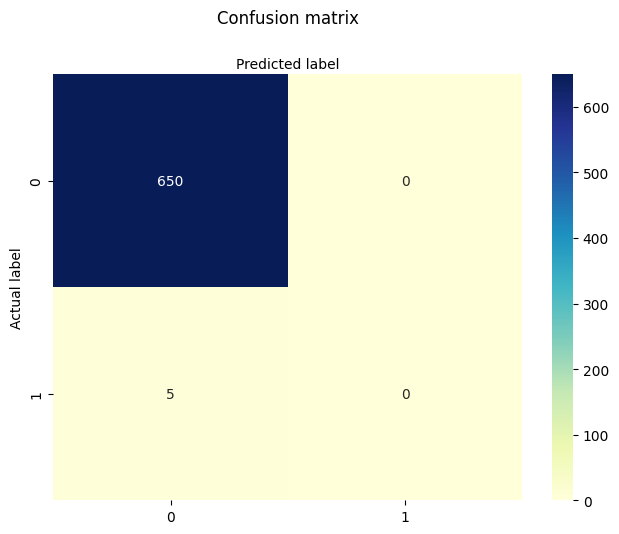

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix for young age displays a representation of the true negatives(TN) that are present within the dataset. It is usually predicted that young people who are people under 45 are less likely to have a stroke which is why the TN score is 461 containing practically all the individuals for this sample. There is one outlier in terms of a false positive(FP) but even so it indicates the result of young people not having strokes. No young person fell within a false negative(FN) or true positive(TP) for this sample so this would indicate the data has a good amount of precision.

Older Age DataFrame 

In [ ]:
oldage_df = stroke_df[stroke_df['age'] > 45]
X = oldage_df[['gender', 'hypertension', "heart_disease", 'avg_glucose_level', 'ever_married']]
y = oldage_df['stroke']

In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Training and Testing 
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9117174959871589
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       568
           1       0.00      0.00      0.00        55

    accuracy                           0.91       623
   macro avg       0.46      0.50      0.48       623
weighted avg       0.83      0.91      0.87       623



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .91, meaning that 91% of the predicted strokes actually had a stroke. 
Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke. 
F1-score: measures the models accuracy on a dataset. our F1-score is .95, meaning that our model is 95% accurate when predicting strokes.


Text(0.5, 427.9555555555555, 'Predicted label')

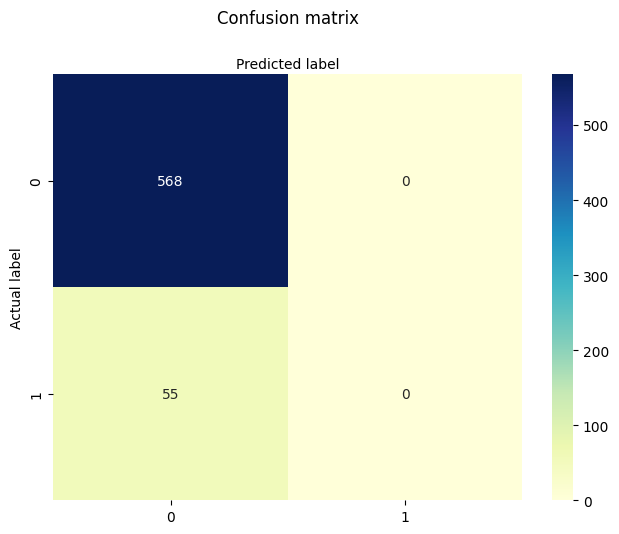

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Given the information in the dataset, the TN results show that the majority of individuals with old age are predicted not to have a stroke however there are more FPs predicted for this sample size perhaps.

Has Been Mariage History Dataframe 

In [ ]:
married_df = stroke_df[stroke_df['ever_married'] == 1]
X = married_df[['age', 'hypertension', "heart_disease", 'avg_glucose_level', 'gender']]
y = married_df['stroke']

In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Training and Testing 
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9415971394517283
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       790
           1       0.00      0.00      0.00        49

    accuracy                           0.94       839
   macro avg       0.47      0.50      0.48       839
weighted avg       0.89      0.94      0.91       839



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .94, meaning that 94% of the predicted strokes actually had a stroke. 
Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke. 
F1-score: measures the models accuracy on a dataset. our F1-score is .97, meaning that our model is 97% accurate when predicting strokes.




Text(0.5, 427.9555555555555, 'Predicted label')

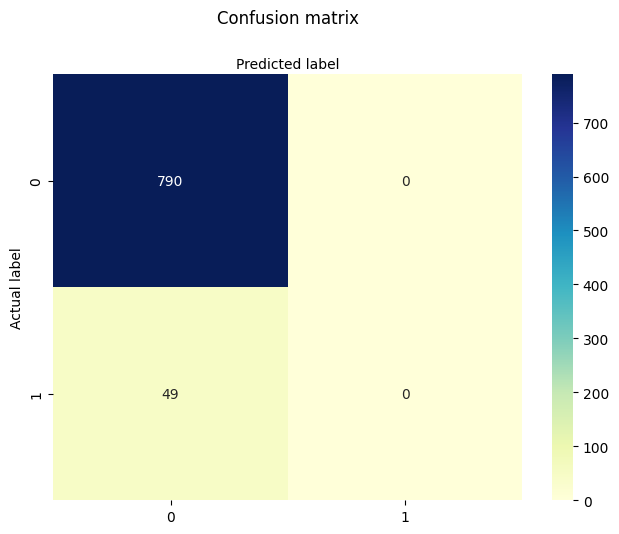

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Looking at this confusion matrix, there are a lot of true negatives and few false positives. This means that our model is correctly predicting a stroke most of the time. There would only be a few cases where someone would have a stroke without the model predicting it first. There are no true negatives or false positives. 

Never Been Married Dataframe 

In [ ]:
NotMarried_df = stroke_df[stroke_df['ever_married'] == 0]
X = NotMarried_df[['age', 'hypertension', "heart_disease", 'avg_glucose_level', 'gender']]
y = NotMarried_df['stroke']

In [ ]:
#Training and Splitting the Data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Training and Testing 
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
#Classification Report
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9772727272727273
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       429
           1       1.00      0.09      0.17        11

    accuracy                           0.98       440
   macro avg       0.99      0.55      0.58       440
weighted avg       0.98      0.98      0.97       440



Classification Report Analysis of Has Been Married Dataframe
Precision: precision is the proportion of predicted positives that are actually positive. Our precision is .98, meaning that 98% of the predicted strokes actually had a stroke. 
Recall: Recall is the proportion of the true (actual) positives that are predicted as positives. This recall is 1.00, meaning 100% of the strokes were predicted to have a stroke.
 F1-score: measures the models accuracy on a dataset. our F1-score is .99, meaning that our model is 99% accurate when predicting strokes.


Text(0.5, 427.9555555555555, 'Predicted label')

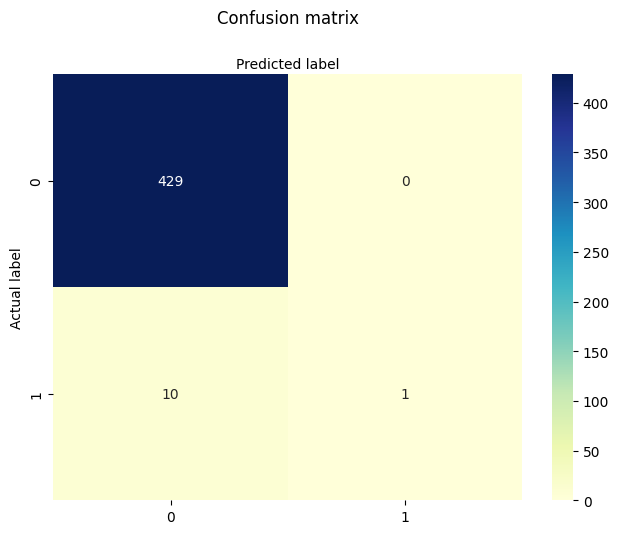

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Looking at this confusion matrix, we can see that there are alot of true negatives and a few false negatives. This means that our model is predicting strokes fairly accurately. It would predict a stroke correctly 429 times and only 10 times it would incorrectly not predict the stroke. There are no false positives, showing the accuracy of our model. There is only 1 true negative. This shows that the majority of people are having strokes.



# Number 8

For AI models the data seems to be precise in measuring for individuals that could have strokes. Overall, it appears that the precision, recall, and F1-scores for predicting strokes are quite high for all the categories analyzed. This suggests that the model is performing well in accurately predicting strokes for both males and females, younger and older individuals, and those who are married or not married.In general, a high number of true negatives and a low number of false positives are desirable in a predictive model, as this indicates that the model is accurately identifying individuals who are not at risk of having a stroke while minimizing the number of false alarms.




  

